In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input

In [27]:
# Prepare the dataset for OR gate
X_or = np.array([[0, 0],
 [0, 1],
 [1, 0],
 [1, 1]])
y_or = np.array([[0], [1], [1], [1]]) # OR gate outputs

In [28]:
# Prepare the dataset for NOR gate
X_nor = np.array([[0, 0],
 [0, 1],
 [1, 0],
 [1, 1]])
y_nor = np.array([[1], [0], [0], [0]]) # NOR gate outputs


In [29]:
# Function to create and train the model
def create_and_train_model(X, y):
 # Create the model
    # Create the model
    model = Sequential([
        Input(shape=(2,)),             # Input layer
        Dense(2, activation='sigmoid'), # Hidden layer
        Dense(1, activation='sigmoid')  # Output layer
    ])
     # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
     # Train the model
    model.fit(X, y, epochs=5000, verbose=0)
    return model
    

In [30]:
# Train the OR gate model
or_model = create_and_train_model(X_or, y_or)
print("OR Gate Predictions:")
print(or_model.predict(X_or))

OR Gate Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[0.25376862]
 [0.897132  ]
 [0.90181166]
 [0.9550679 ]]


In [31]:
# Train the NOR gate model
nor_model = create_and_train_model(X_nor, y_nor)
print("\nNOR Gate Predictions:")
print(nor_model.predict(X_nor))


NOR Gate Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.8687812 ]
 [0.10376457]
 [0.09027813]
 [0.05710527]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


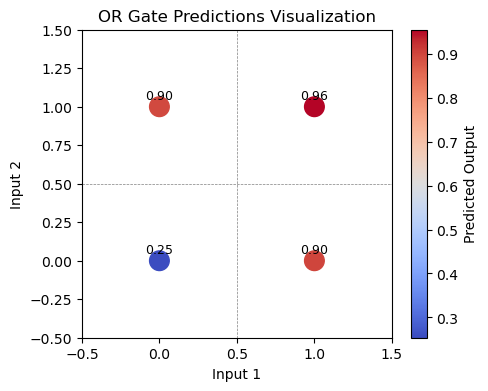

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


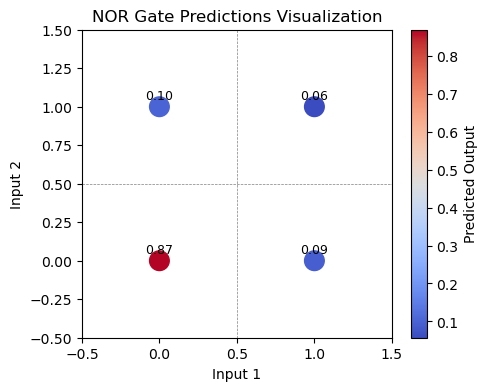

In [34]:
def plot_predictions(model, X, title):
    predictions = model.predict(X).flatten()

    # Create scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', s=200)
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.colorbar(label='Predicted Output')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.axhline(0.5, color='grey', lw=0.5, ls='--')
    plt.axvline(0.5, color='grey', lw=0.5, ls='--')

    # Show predicted values near each point
    for (x1, x2), pred in zip(X, predictions):
        plt.text(x1, x2 + 0.05, f"{pred:.2f}", ha='center', fontsize=9)

    plt.show()


plot_predictions(or_model, X_or, "OR Gate Predictions Visualization")
plot_predictions(nor_model, X_nor, "NOR Gate Predictions Visualization")